## **Pemrosesan Outlier (Outlier Engineering)**

Pemrosesan outlier adalah langkah-langkah yang dilakukan dalam analisis data untuk mengatasi titik data yang sangat berbeda atau tidak biasa dibandingkan dengan data lainnya dalam suatu kumpulan data. Outlier dapat merusak statistik seperti rata-rata dan varians, dan beberapa model Machine Learning dapat terpengaruh oleh outlier, sehingga kinerjanya dapat menurun. Oleh karena itu, tergantung pada jenis algoritma yang digunakan, seringkali perlu untuk menghapus outlier dari variabel-variabel dalam data kita.

### Bagaimana Cara Memproses Outlier?

Ada beberapa cara untuk memproses outlier:

1. **Pemotongan (Trimming):** Menghapus outlier dari dataset.
2. **Diskritisasi:** Menempatkan outlier dalam kategori yang mencakup nilai-nilai tinggi atau rendah dalam distribusi.
3. **Pembatasan:** Memasang batasan nilai maksimum dan/atau minimum dalam distribusi variabel.

### Pembatasan

**Pembatasan** adalah tindakan membatasi nilai maksimum dan/atau minimum dalam suatu distribusi pada nilai tertentu yang ditentukan tanpa memperhatikan seberapa ekstrim nilai tersebut. Artinya, nilai yang lebih besar atau lebih kecil dari nilai yang ditentukan akan diatur menjadi nilai yang sama dengan batasan tersebut.

Pembatasan dapat diterapkan pada kedua ujung distribusi atau hanya pada salah satu ujung, tergantung pada variabel dan kebutuhan pengguna.

Nilai-nilai batasan untuk Pembatasan dapat ditentukan dengan beberapa cara, termasuk:

- Nilai yang ditentukan secara bebas
- Menggunakan aturan dekat kisaran inter-kuantil (IQR)
- Menggunakan pendekatan aproksimasi Gaussian
- Menggunakan nilai batas kuantil

### Keuntungan

- Tidak menghilangkan data dari dataset

### Batasan

- Mengubah distribusi variabel
- Memengaruhi hubungan antar variabel

**Dalam demonstrasi ini, kita akan melihat bagaimana menerapkan Pembatasan dengan aturan dekat kisaran inter-kuantil (IQR) menggunakan dataset Harga rumah california.**

**Penting**: Ketika menerapkan Pembatasan, biasanya kita melakukannya dari dataset pelatihan, bukan dataset uji (data test). Hal ini memastikan bahwa model dievaluasi pada data test (data masa depan), termasuk outlier, untuk mengukur kinerjanya secara akurat.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# untuk plot Q-Q
import scipy.stats as stats

# untuk membagi kumpulan data
from sklearn.model_selection import train_test_split

In [3]:
# memuat data harga Rumah Boston
# data_boston adalah rangkaian data di sini

data = pd.read_csv('california_dataset.csv')

# ambil untuk beberapa kolom saja, aslinya nanti harus diolah dan dianalisa semuanya
data = data[['MedInc','Population']]

data.head()

,MedInc,Population
0,8.3252,322.0
1,8.3014,2401.0
2,7.2574,496.0
3,5.6431,558.0
4,3.8462,565.0


In [5]:
# mari kita pisahkan menjadi data train dan data test

train, test = train_test_split(data, test_size=0.2, random_state=42)

train.shape, test.shape

#Handling outlier hanya pada data train
#Data test tidak perlu dilakukan handling outlier (data masa depan, untuk melihat performa model)

((16512, 2), (4128, 2))

In [7]:
# berfungsi untuk membuat histogram, plot Q-Q


def plot_diagnosa(df, variable):
    # fungsi mengambil kerangka data (df) dan
    # variabel yang diminati sebagai argumen

    # tentukan ukuran gambar
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Plot Q-Q
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # box plot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

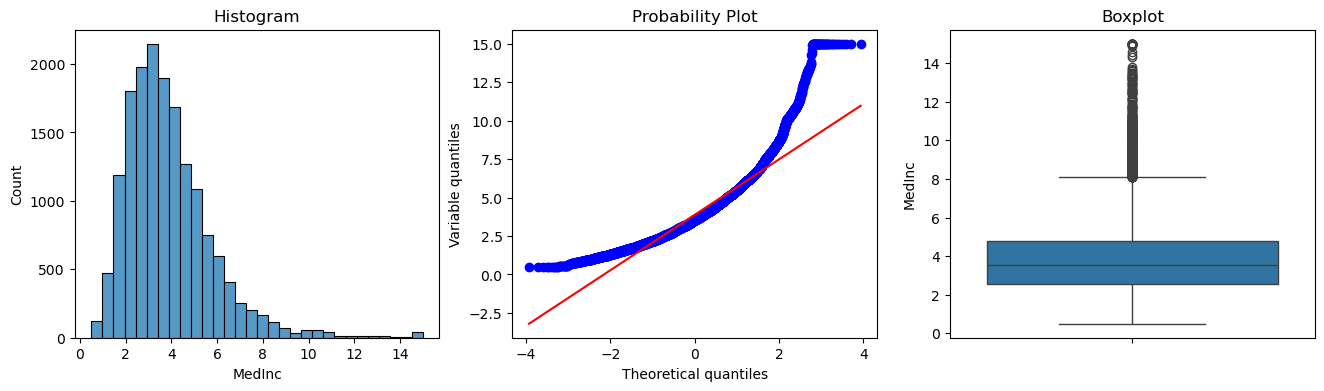

In [9]:
# mari kita temukan outlier di MedInc

plot_diagnosa(train, 'MedInc')

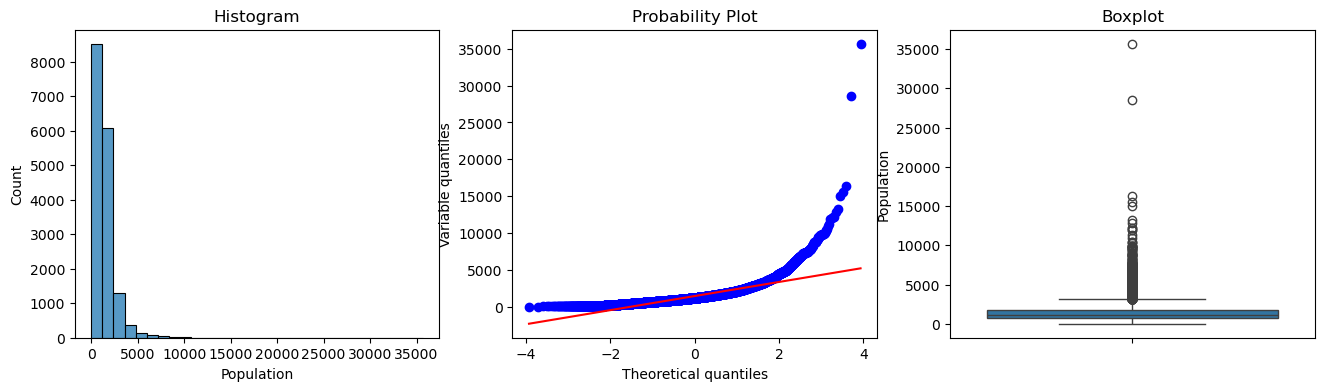

In [10]:
# memvisualisasikan outlier di Population

plot_diagnosa(train, 'Population')

In [11]:
def batas_normal(df, variable, distance):

    # hitung batas luar yang merupakan outlier untuk distribusi Gaussian

    upper_boundary = df[variable].mean() + distance * df[variable].std()
    lower_boundary = df[variable].mean() - distance * df[variable].std()

    return upper_boundary, lower_boundary

In [13]:
# temukan batasan untuk MedInc

MedInc_upper_limit, MedInc_lower_limit = batas_normal(train, 'MedInc', 3) #1,5 atau 3
MedInc_upper_limit, MedInc_lower_limit

(9.593636025187276, -1.8321275101678967)

In [14]:
# batas untuk Population

Population_upper_limit, Population_lower_limit = batas_normal(train, 'Population', 3) #1,5 atau 3
Population_upper_limit, Population_lower_limit

(4837.62214321905, -1984.7161354671116)

In [19]:
train.shape

(16512, 2)

In [21]:
# Sekarang mari kita ganti outlier dengan batas maksimum dan minimum

train['MedInc']= np.where(train['MedInc'] > MedInc_upper_limit, MedInc_upper_limit,
                       np.where(train['MedInc'] < MedInc_lower_limit, MedInc_lower_limit, train['MedInc']))

In [23]:
train.shape

(16512, 2)

In [25]:
# Sekarang mari kita ganti outlier dengan batas maksimum dan minimum

train['Population']= np.where(train['Population'] > Population_upper_limit, Population_upper_limit,
                       np.where(train['Population'] < Population_lower_limit, Population_lower_limit, train['Population']))

In [27]:
train.shape

(16512, 2)

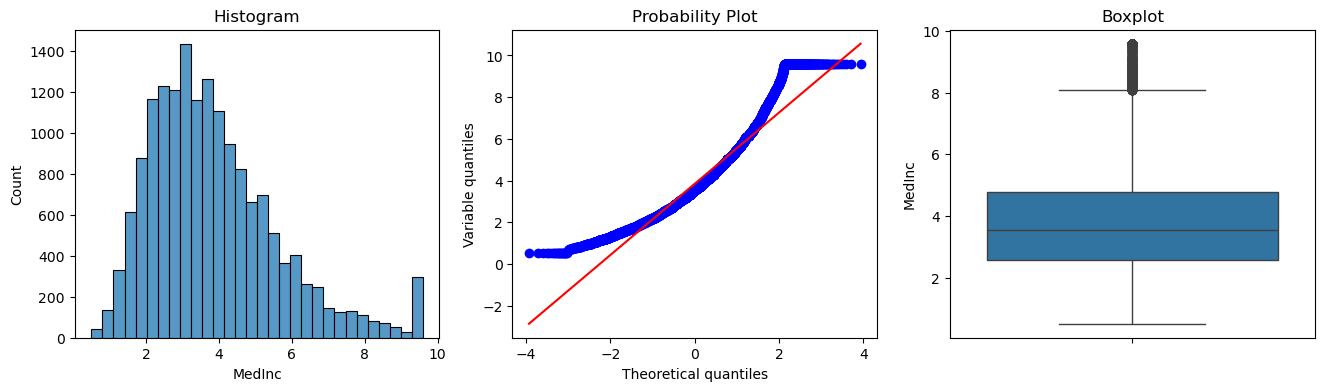

In [29]:
# mari jelajahi outlier pada kumpulan data yang telah dipangkas
# untuk MedInc kita melihat lebih sedikit outlier seperti pada dataset asli

plot_diagnosa(train, 'MedInc')

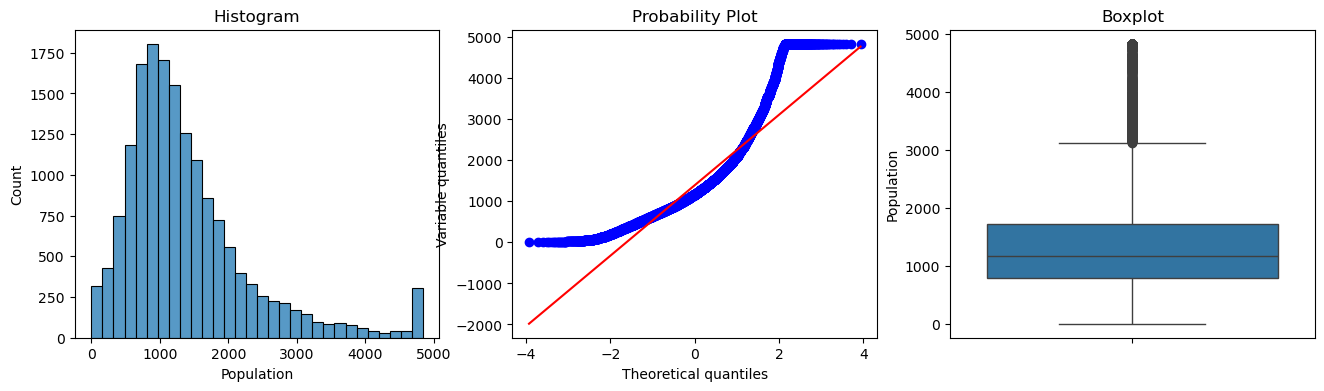

In [31]:
plot_diagnosa(train, 'Population')

##### Pernyataan tersebut menjelaskan bahwa dari kedua variabel yang telah dianalisis, tidak ada satupun yang memiliki distribusi data yang terlihat seperti distribusi normal.

## Assignment :
1. Coba lakukan analisa untuk keseluruhan kolom selain 'MedInc','Population' pada data yang digunakan kecuali kolom target yaitu house_price
2. Lakukan interpretasi untuk analisa yang sudah dilakukan
3. Next dibahas dan dipresentasikan

In [34]:
df = pd.read_csv('california_dataset.csv')

In [36]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'house_price'],
      dtype='object')

In [39]:
df = df[['HouseAge', 'AveRooms', 'AveBedrms', 'AveOccup','Latitude', 'Longitude']]
df.head()

,HouseAge,AveRooms,AveBedrms,AveOccup,Latitude,Longitude
0,41.0,6.984127,1.023810,2.555556,37.88,-122.23
1,21.0,6.238137,0.971880,2.109842,37.86,-122.22
2,52.0,8.288136,1.073446,2.802260,37.85,-122.24
3,52.0,5.817352,1.073059,2.547945,37.85,-122.25
4,52.0,6.281853,1.081081,2.181467,37.85,-122.25


In [42]:
train, test = train_test_split(df, test_size=0.2, random_state=42)
train.shape, test.shape

((16512, 6), (4128, 6))

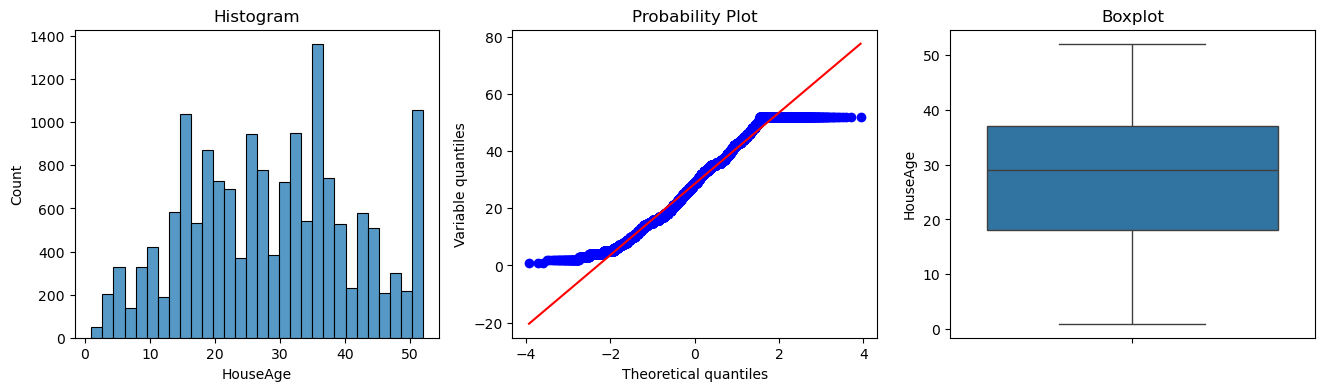

In [45]:
plot_diagnosa(train, 'HouseAge')

In [50]:
HouseAge_upper_limit, HouseAge_lower_limit = batas_normal(train, 'HouseAge', 1.5)
HouseAge_upper_limit, HouseAge_lower_limit

(47.51203391210153, 9.704535855340335)

In [53]:
train['HouseAge']= np.where(train['HouseAge'] > HouseAge_upper_limit, HouseAge_upper_limit,
                       np.where(train['HouseAge'] < HouseAge_lower_limit, HouseAge_lower_limit, train['HouseAge']))

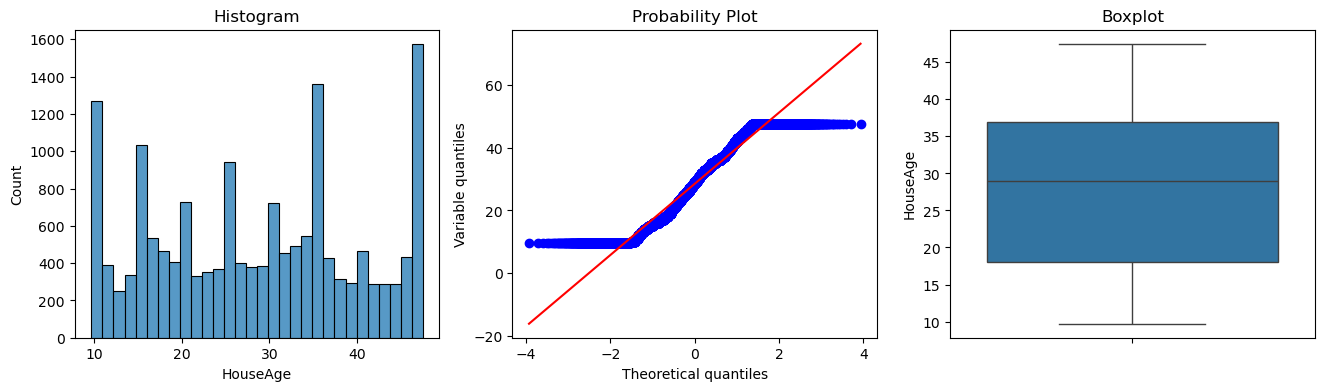

In [55]:
plot_diagnosa(train, 'HouseAge')

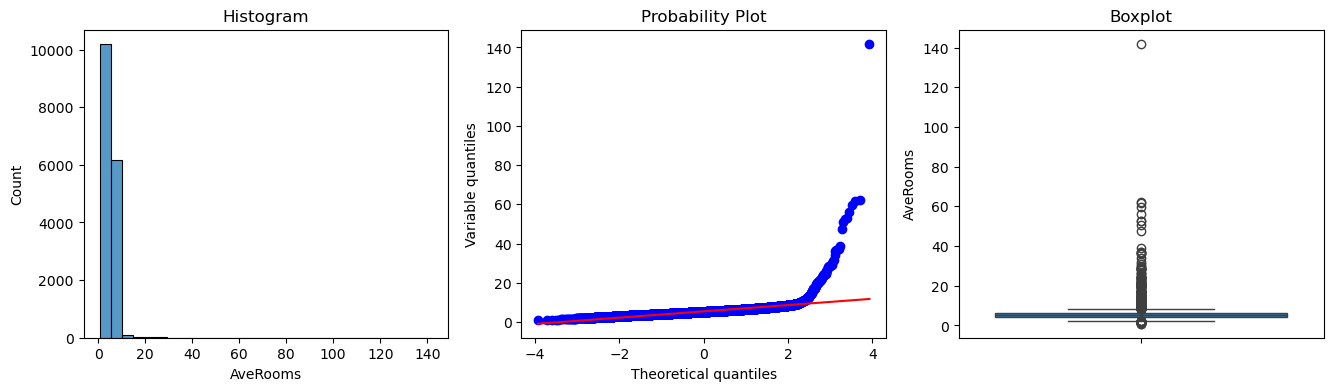

In [57]:
plot_diagnosa(train, 'AveRooms')

In [60]:
AveRooms_upper_limit, AveRooms_lower_limit = batas_normal(train, 'AveRooms', 1.5)
AveRooms_upper_limit, AveRooms_lower_limit

(9.016297329890037, 1.8541727110850248)

In [63]:
train['AveRooms']= np.where(train['AveRooms'] > AveRooms_upper_limit, AveRooms_upper_limit,
                       np.where(train['AveRooms'] < AveRooms_lower_limit, AveRooms_lower_limit, train['AveRooms']))

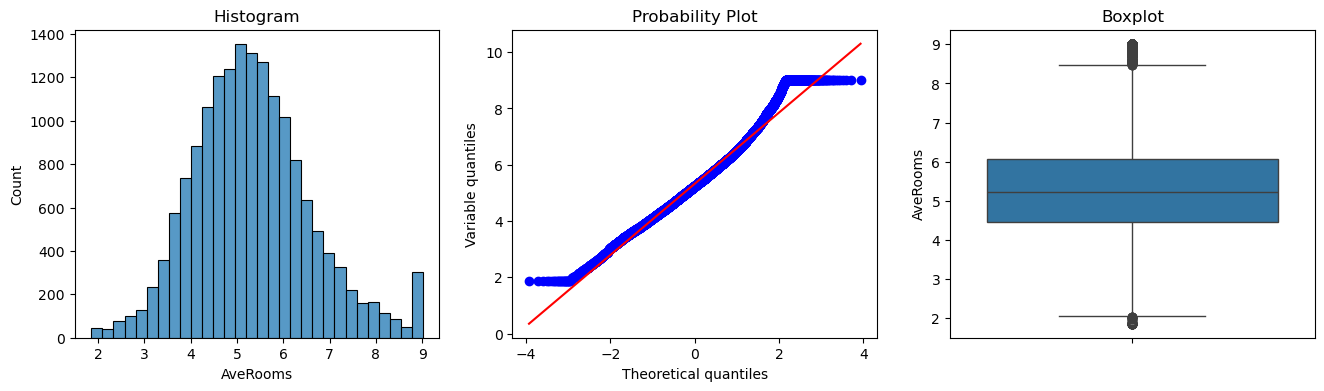

In [65]:
plot_diagnosa(train, 'AveRooms')

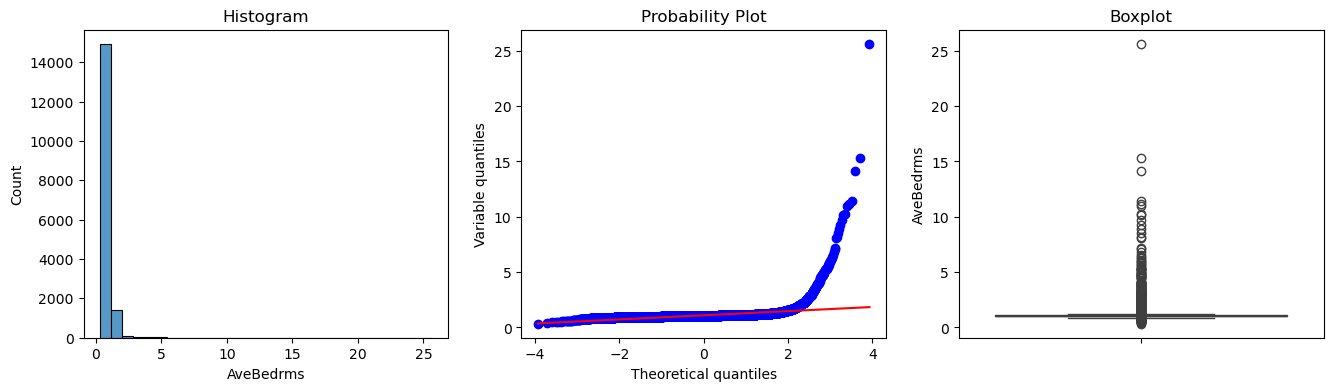

In [67]:
plot_diagnosa(train, 'AveBedrms')

In [70]:
AveBedrms_upper_limit, AveBedrms_lower_limit = batas_normal(train, 'AveBedrms', 1.5)
AveBedrms_upper_limit, AveBedrms_lower_limit

(1.7465065657436776, 0.44686293183539827)

In [73]:
train['AveBedrms']= np.where(train['AveBedrms'] > AveBedrms_upper_limit, AveBedrms_upper_limit,
                       np.where(train['AveBedrms'] < AveBedrms_lower_limit, AveBedrms_lower_limit, train['AveBedrms']))

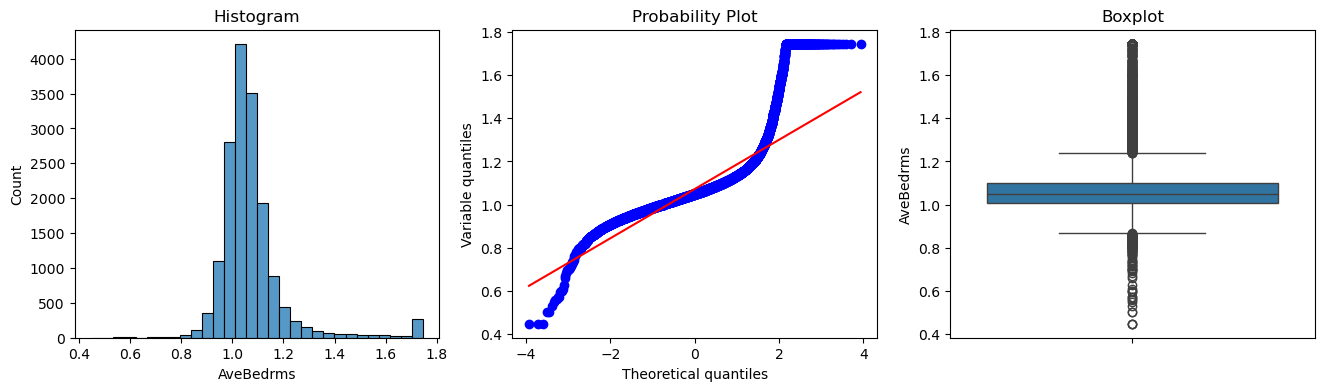

In [75]:
plot_diagnosa(train, 'AveBedrms')

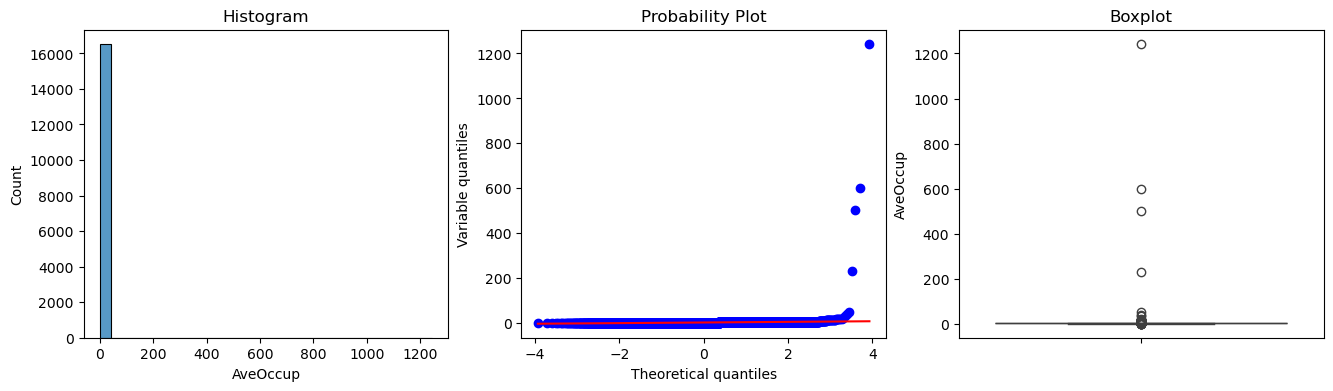

In [79]:
plot_diagnosa(train, 'AveOccup')

In [82]:
AveOccup_upper_limit, AveOccup_lower_limit = batas_normal(train, 'AveOccup', 1.5)
AveOccup_upper_limit, AveOccup_lower_limit

(20.465077391463236, -14.271155002125733)

In [85]:
train['AveOccup']= np.where(train['AveOccup'] > AveOccup_upper_limit, AveOccup_upper_limit,
                       np.where(train['AveOccup'] < AveOccup_lower_limit, AveOccup_lower_limit, train['AveOccup']))

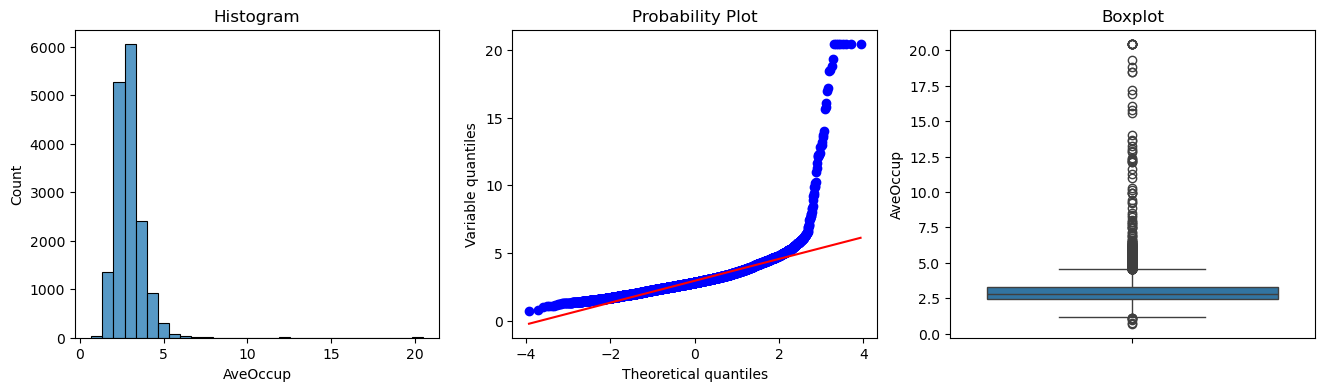

In [87]:
plot_diagnosa(train, 'AveOccup')

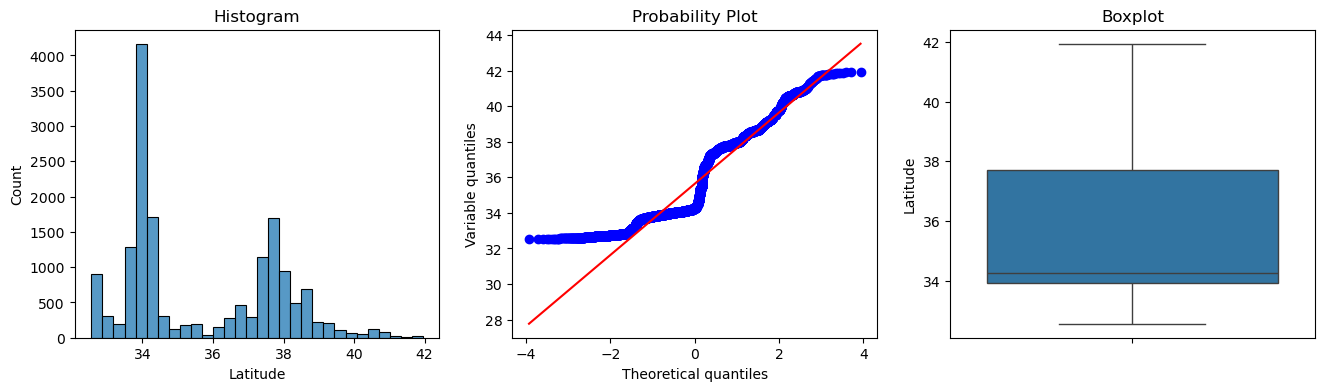

In [89]:
plot_diagnosa(train, 'Latitude')

In [92]:
Latitude_upper_limit, Latitude_lower_limit = batas_normal(train, 'Latitude', 1.5)
Latitude_upper_limit, Latitude_lower_limit

(38.84814716940558, 32.438151280206824)

In [95]:
train['Latitude']= np.where(train['Latitude'] > Latitude_upper_limit, Latitude_upper_limit,
                       np.where(train['Latitude'] < Latitude_lower_limit, Latitude_lower_limit, train['Latitude']))

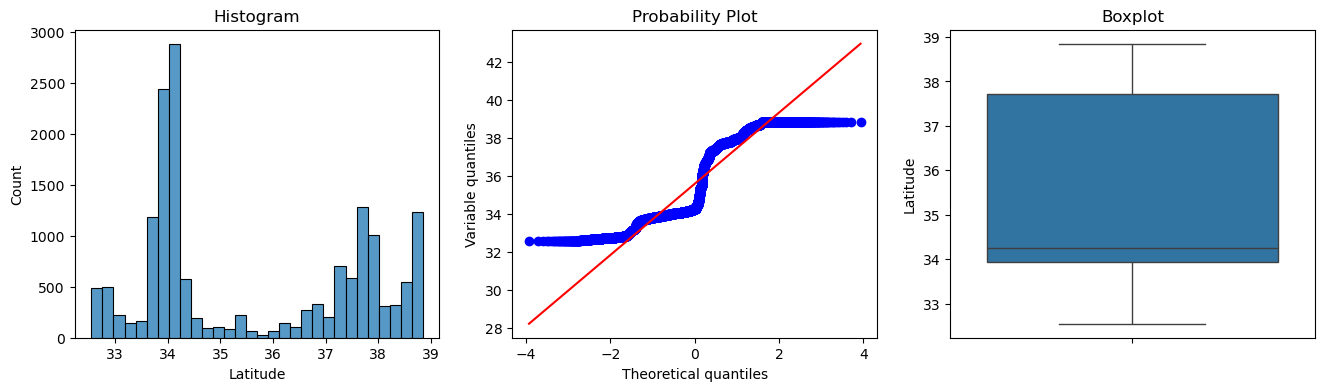

In [97]:
plot_diagnosa(train, 'Latitude')

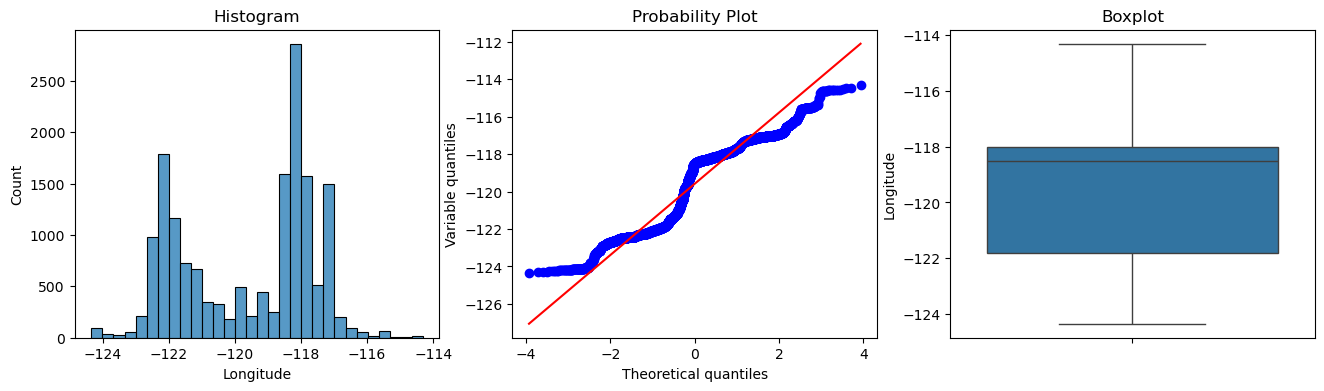

In [99]:
plot_diagnosa(train, 'Longitude')

In [104]:
Longitude_upper_limit, Longitude_lower_limit = batas_normal(train, 'Longitude', 1.5)
Longitude_upper_limit, Longitude_lower_limit

(-116.57381014438143, -122.5907707664713)

In [107]:
train['Longitude']= np.where(train['Longitude'] > Longitude_upper_limit, Longitude_upper_limit,
                       np.where(train['Longitude'] < Longitude_lower_limit, Longitude_lower_limit, train['Longitude']))

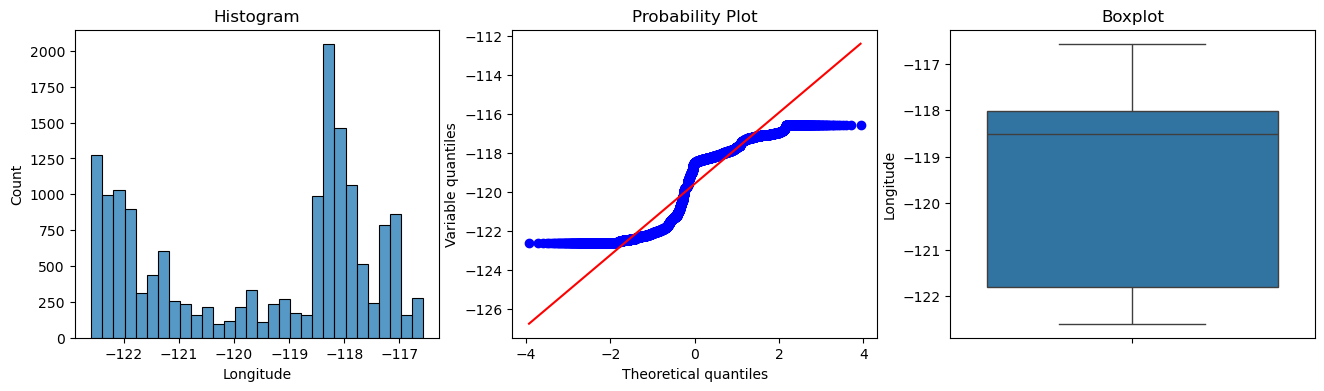

In [109]:
plot_diagnosa(train, 'Longitude')

Setelah menghapus outlier dengan metode Gaussian, distribusi data menjadi lebih rapi dan tidak terlalu menyebar jauh. Pada variabel HouseAge, AveRooms, AveBedrms, dan AveOccup, sebelumnya terdapat banyak nilai ekstrem yang membuat data tampak berantakan, terlihat dari histogram yang tidak merata dan adanya titik-titik jauh di boxplot. Setelah pembersihan, distribusi menjadi lebih seimbang, meskipun masih ada beberapa pola unik dalam data. Untuk variabel Latitude dan Longitude, penghapusan outlier membantu menghilangkan titik-titik yang terlalu jauh, sehingga rentang nilai lebih masuk akal. Pada QQ Plot, sebelum pembersihan, banyak titik yang menyimpang dari garis merah yang menandakan distribusi normal, tetapi setelahnya, sebagian besar data lebih mendekati garis tersebut. Secara keseluruhan, setelah menghapus outlier, data menjadi lebih bersih dan lebih siap untuk dianalisis tanpa gangguan dari nilai-nilai ekstrem. Namun, pola tertentu dalam data masih tetap ada, yang mungkin menunjukkan adanya perbedaan kelompok atau segmen dalam dataset ini.